In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pickle
import spliland
import importlib
import random
import fclParse
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras_lr_finder import LRFinder

In [2]:
directory = './template_data_v2/set_1/'
n_epochs = 50

In [3]:
tf.config.run_functions_eagerly(True)

## Intro

The purpose of this notebook is to make a second attempt at a neural network, following along with what was described in the paper "Deep Learning Based Pulse Shape Analysis for GERDA" by Philipp Holl in 2017. This algorithm consists of an autoencoder, decoder, and then classifier.

I am also following this guide: https://keras.io/examples/timeseries/timeseries_anomaly_detection/ for the implementation of the layers described in the paper into python

### Prep the data

In [4]:
n_points = 4500

with open(directory + 'x.data', 'rb') as xFile:
    biggestX = pickle.load(xFile)
    x_train = []
    x_test = []
    for x in biggestX[:n_points]:
        x_train.append(x)
    for x in biggestX[n_points:n_points+500]:
        x_test.append(x)
    xFile.close()

with open(directory + 'y.data', 'rb') as yFile:
    biggestY = pickle.load(yFile)
    y_train = biggestY[:n_points]
    y_test = biggestY[n_points:n_points+500]
    yFile.close()
    
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
X_train = np.reshape(x_train, (n_points, 21816, 1))
Y_train = np.reshape(y_train, (n_points, 1))

In [6]:
X_train.shape

(4500, 21816, 1)

### Classifier

In [7]:
classifier_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(21816,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu')
])

In [8]:
optimizer = keras.optimizers.Adam(lr=0.0002)
classifier_model.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
print(X_train.shape)
print(Y_train.shape)

(4500, 21816, 1)
(4500, 1)


In [9]:
# model is a Keras model
lr_finder = LRFinder(classifier_model)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(x_train, y_train, start_lr=0.00001, end_lr=1, batch_size=512, epochs=50)

/home/lars/miniconda3/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/50
9/9 [==============================] - 2s 176ms/step - loss: 2.9334 - accuracy: 0.2282
Epoch 2/50
9/9 [==============================] - 1s 153ms/step - loss: 2.9075 - accuracy: 0.2364
Epoch 3/50
9/9 [==============================] - 1s 150ms/step - loss: 2.8700 - accuracy: 0.2402
Epoch 4/50
9/9 [==============================] - 1s 161ms/step - loss: 2.7982 - accuracy: 0.2413
Epoch 5/50
9/9 [==============================] - 1s 155ms/step - loss: 2.6595 - accuracy: 0.2416
Epoch 6/50
9/9 [==============================] - 1s 157ms/step - loss: 2.4472 - accuracy: 0.2416
Epoch 7/50
9/9 [==============================] - 1s 148ms/step - loss: 2.1434 - accuracy: 0.2416
Epoch 8/50
9/9 [==============================] - 1s 157ms/step - loss: 1.8097 - accuracy: 0.2693
Epoch 9/50
9/9 [==============================] - 1s 149ms/step - loss: 1.7453 - accuracy: 0.2887
Epoch 10/50
9/9 [==============================] - 1s 157ms/step - loss: 1.6630 - accuracy: 0.3562
Epoch 11/50
9/9 [==

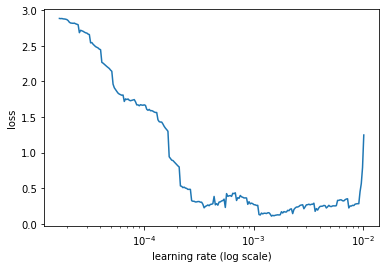

In [10]:
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

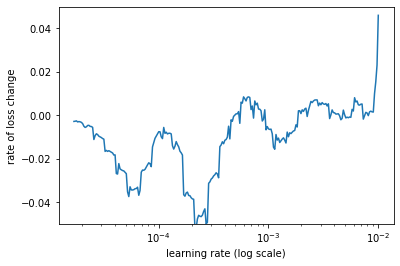

In [11]:
# Plot rate of change of the loss
# Ignore 20 batches in the beginning and 5 in the end
# Smooth the curve using simple moving average of 20 batches
# Limit the range for y axis to (-0.02, 0.01)
lr_finder.plot_loss_change(sma=20, n_skip_beginning=20, n_skip_end=5, y_lim=(-0.05, 0.05))

In [12]:
classifier_history = classifier_model.fit(X_train,
                                          Y_train,
                                          epochs=n_epochs)

Epoch 1/50
141/141 [==============================] - 8s 54ms/step - loss: 2.4420 - accuracy: 0.3056
Epoch 2/50
141/141 [==============================] - 7s 53ms/step - loss: 0.9509 - accuracy: 0.5853
Epoch 3/50
141/141 [==============================] - 8s 53ms/step - loss: 0.6021 - accuracy: 0.7442
Epoch 4/50
141/141 [==============================] - 8s 54ms/step - loss: 0.3826 - accuracy: 0.8458
Epoch 5/50
141/141 [==============================] - 7s 53ms/step - loss: 0.2423 - accuracy: 0.9100
Epoch 6/50
141/141 [==============================] - 7s 52ms/step - loss: 0.1906 - accuracy: 0.9307
Epoch 7/50
141/141 [==============================] - 8s 55ms/step - loss: 0.1302 - accuracy: 0.9569
Epoch 8/50
141/141 [==============================] - 7s 52ms/step - loss: 0.1117 - accuracy: 0.9638
Epoch 9/50
141/141 [==============================] - 7s 52ms/step - loss: 0.0901 - accuracy: 0.9727
Epoch 10/50
141/141 [==============================] - 7s 53ms/step - loss: 0.0727 - accura

### Performance Stats

No handles with labels found to put in legend.
No handles with labels found to put in legend.


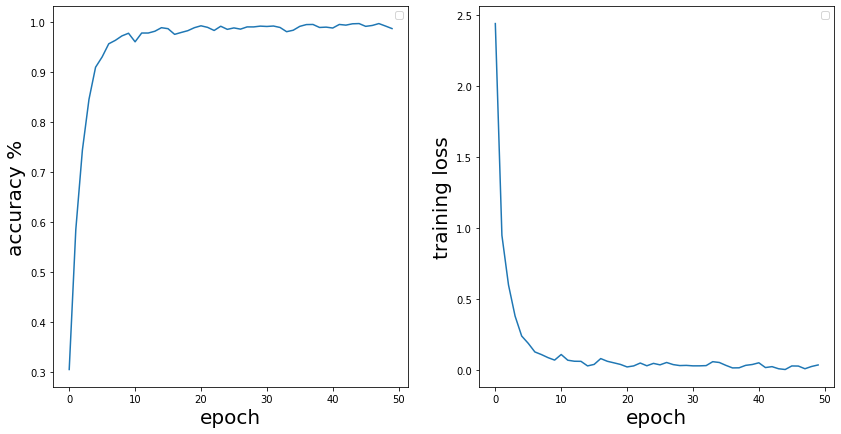

In [13]:
fig, ax = plt.subplots(1,2);
fig.set_size_inches(14,7);

ax[0].plot(classifier_history.history['accuracy'])

ax[0].set_xlabel("epoch", fontsize=20)
ax[0].set_ylabel("accuracy %", fontsize=20)
ax[0].legend()

ax[1].plot(classifier_history.history['loss'])

ax[1].set_xlabel("epoch", fontsize=20)
ax[1].set_ylabel("training loss", fontsize=20)
ax[1].legend()

In [14]:
Y_pred = classifier_model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

matrix = confusion_matrix(y_test, y_pred, normalize='true', labels=[0,1,2,3,4,5,6])

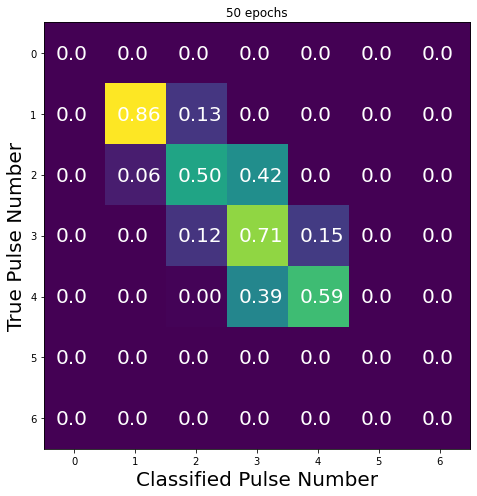

In [15]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

labels = ['0', '1', '2', '3', '4', '5', '6']

grid = np.array(matrix)
im = ax.imshow(grid)

for k in range (0, len(grid)):
        for l in range (0, len(grid[0])):
            ax.text(l-0.3, k+0.1, str(grid[k][l])[:4], size=20, color='white')
            
ax.set_xticklabels([''] + labels);
ax.set_yticklabels([''] + labels);

ax.set_ylabel('True Pulse Number', fontsize=20);
ax.set_xlabel('Classified Pulse Number', fontsize=20);
ax.set_title('{0} epochs'.format(n_epochs))

fig.tight_layout()

#ax.set_title("with autoencoder", fontsize=20)
#plt.savefig(directory + "e{0}.png".format(n_epochs))

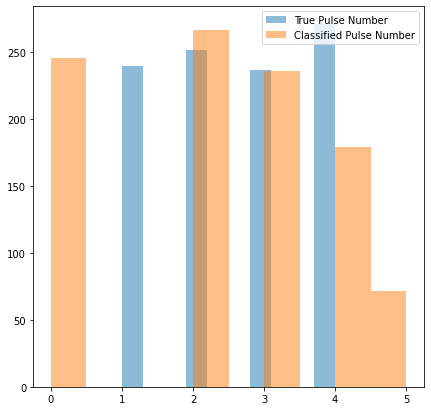

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

ax.hist(y_test, alpha=0.5, label='True Pulse Number')
ax.hist(y_pred, alpha=0.5, label='Classified Pulse Number')
ax.legend()

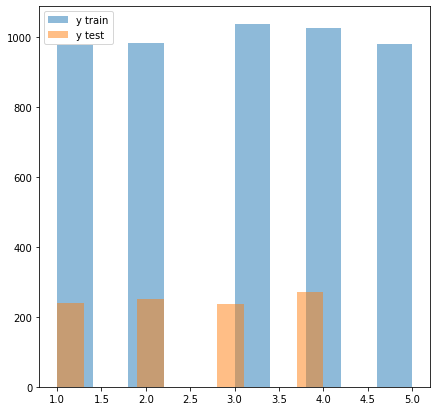

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

ax.hist(y_train, alpha=0.5, label='y train')
ax.hist(y_test, alpha=0.5, label='y test')
ax.legend()

array([4, 4, 2, 5, 1, 1, 4, 5, 2, 3, 2, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 5,
       1, 1, 3, 5, 2, 3, 3, 5, 3, 1, 2, 4, 1, 3, 4, 1, 5, 4, 4, 3, 2, 4,
       2, 4, 5, 3, 1, 3, 4, 4, 4, 2, 1, 4, 3, 4, 1, 3, 5, 1, 3, 5, 2, 3,
       3, 1, 1, 5, 3, 4, 4, 2, 1, 3, 2, 1, 5, 5, 1, 5, 3, 1, 1, 3, 1, 5,
       5, 3, 1, 2, 1, 1, 4, 3, 3, 1, 2, 5])